In [2]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/ameen/Downloads/Visadataset - Visadataset.csv")

In [4]:
cat = df.select_dtypes(include = 'object').columns
num = df.select_dtypes(exclude = 'object').columns

In [5]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [6]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [7]:
df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [8]:
np.min(df['prevailing_wage'])

2.1367

In [9]:
count = len(df['prevailing_wage'])
min = np.min(df['prevailing_wage'])
max = np.max(df['prevailing_wage'])
mean = np.mean(df['prevailing_wage'])
median = np.median(df['prevailing_wage'])
print(min)
print(max)
print(mean)
print(median)

2.1367
319210.27
74455.81459209183
70308.20999999999


In [10]:
l = [count,min,max,mean,median]

In [11]:
for i in range(len(l)):
    l[i] = round(l[i])

In [12]:
stats_df = pd.DataFrame(l, index = ['Count','Min', 'Max', 'Mean', 'Median'], columns = ['Prevailing_wage'])

In [13]:
stats_df

,Prevailing_wage
Count,25480
Min,2
Max,319210
Mean,74456
Median,70308


In [14]:
# replacing these
min = np.min(df['prevailing_wage'])
max = np.max(df['prevailing_wage'])
mean = np.mean(df['prevailing_wage'])
median = np.median(df['prevailing_wage'])

# we can also use:
min = df['prevailing_wage'].min()
max = df['prevailing_wage'].max()
mean = df['prevailing_wage'].mean()
median = df['prevailing_wage'].median()

### percentile and quantile

In [15]:
wage_data = df['prevailing_wage']

In [16]:
np.percentile(wage_data,50)

70308.20999999999

In [17]:
np.quantile(wage_data,0.5)

70308.20999999999

In [18]:
np.median(wage_data)

70308.20999999999

In [19]:
# 50p = 70308.20
# 50 percentage of data is less than 70308.20
# 12740 of 25480 has values less than 70308.20
p_50 = np.percentile(wage_data,50)
con = wage_data < p_50
len(df[con])

12740

In [20]:
np.percentile(wage_data, 25)

34015.479999999996

In [21]:
# 25% of 25480 = 

In [22]:
p_25 = np.percentile(wage_data,25)
con = wage_data < p_25
len(df[con])

6370

In [23]:
p_75 = np.percentile(wage_data,75)
con = wage_data < p_75
len(df[con])

19110

In [24]:
stats_df = stats_df.T

In [25]:
stats_df['p_25'] = p_25
stats_df['p_50'] = p_50
stats_df['p_75'] = p_75

In [26]:
stats_df.T

,Prevailing_wage
Count,25480.0000
Min,2.0000
Max,319210.0000
Mean,74456.0000
Median,70308.0000
p_25,34015.4800
p_50,70308.2100
p_75,107735.5125


In [27]:
l = []
for i in num:
    data = df[i]
    count = len(data)
    min = np.min(data)
    max = np.max(data)
    mean = np.mean(data)
    median = np.median(data)
    p_25 = np.percentile(data,25)
    p_50 = np.percentile(data,50)
    p_75 = np.percentile(data,75)
    a = [count, min, max, mean, median, p_25, p_50, p_75]
    l.append(a)
l

[[25480, -26, 602069, 5667.043210361067, 2109.0, 1022.0, 2109.0, 3504.0],
 [25480, 1800, 2016, 1979.409929356358, 1997.0, 1976.0, 1997.0, 2005.0],
 [25480,
  2.1367,
  319210.27,
  74455.81459209183,
  70308.20999999999,
  34015.479999999996,
  70308.20999999999,
  107735.51250000001]]

In [28]:
Stats_df = pd.DataFrame(l, columns = ['Count', 'Min', 'Max', 'Mean', 'Median', 'p_25', 'p_50', 'p_75'])

In [29]:
Stats_df.T

,0,1,2
Count,25480.00000,25480.000000,25480.000000
Min,-26.00000,1800.000000,2.136700
Max,602069.00000,2016.000000,319210.270000
Mean,5667.04321,1979.409929,74455.814592
Median,2109.00000,1997.000000,70308.210000
p_25,1022.00000,1976.000000,34015.480000
p_50,2109.00000,1997.000000,70308.210000
p_75,3504.00000,2005.000000,107735.512500


In [30]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


- u-1*sigma to u+1*sigma, the data coverage is 68%

In [31]:
u = wage_data.mean()

In [32]:
std = wage_data.std()

In [33]:
lower_bound = u-1*std

In [34]:
upper_bound = u+1*std

In [35]:
cond1 = wage_data > lower_bound

In [36]:
cond2 = wage_data < upper_bound

In [37]:
cond = cond1 & cond2

In [38]:
df[cond]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.56,Year,Y,Certified
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.78,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [39]:
68*25480/100

17326.4

In [40]:
len(df[con]) == 68*25480/100

False

In [41]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [75]:
no_of_employees = df['no_of_employees']
year_of_establish = df['yr_of_estab']

In [43]:
def empirical(data, n, k):
    u = data.mean()
    std = data.std()
    lower_bound = u-k*std
    upper_bound = u+k*std
    cond1 = data > lower_bound
    cond2 = data < upper_bound
    cond = cond1 & cond2
    return len(df[con]) == n*25480/100

In [44]:
empirical(wage_data,68,1)

False

In [45]:
empirical(wage_data,95,2)

False

In [46]:
empirical(wage_data,99.7,3)

False

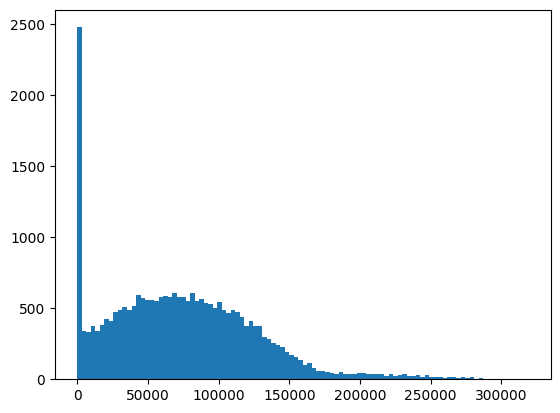

In [73]:
plt.hist(wage_data, bins = 100)
plt.show()

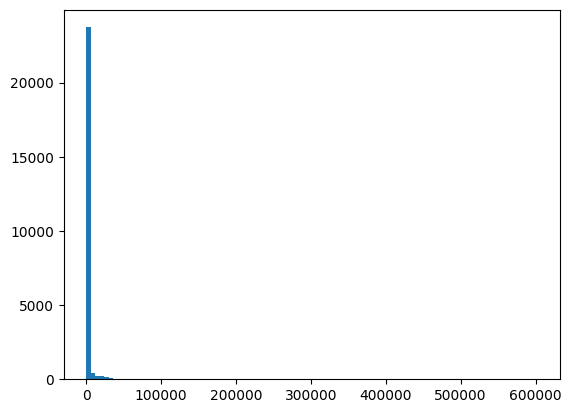

In [76]:
plt.hist(no_of_employees,bins = 100)
plt.show()

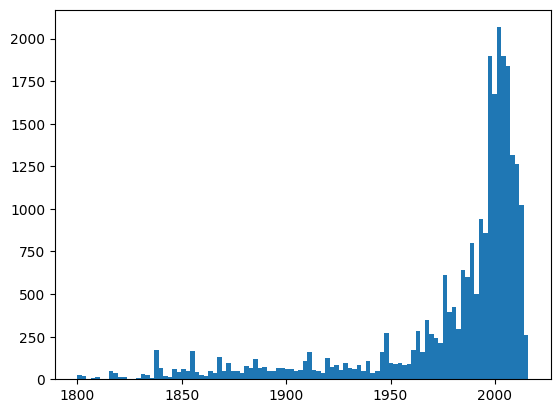

In [77]:
plt.hist(year_of_establish, bins = 100)
plt.show()

In [50]:
lb = 2.13670000e+00
ub = 7.98234003e+03

con1 = wage_data > lb
con2 = wage_data < ub
con = con1 & con2
len(df[con])

2991

- Data skewed

- Not following normal distribution

- Meaning outliers are present     

### Box plot

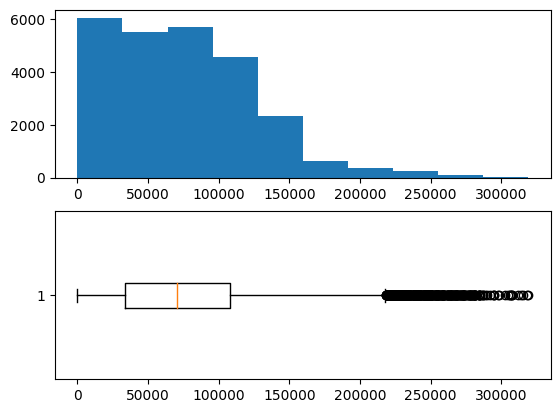

In [51]:
plt.subplot(2,1,1).hist(wage_data)
plt.subplot(2,1,2).boxplot(wage_data, vert = False)
plt.show()

          Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

In [52]:
#lb = Q1 - 1.5IQR
#ub = Q3 + 1.5IQR

# Outliers data

Q1 = np.percentile(wage_data,25)
Q3 = np.percentile(wage_data,75)
IQR = Q3 - Q1
lb = Q1 - 1.5*IQR
ub = Q3 + 1.5*IQR
con1 = wage_data < lb
con2 = wage_data > ub
con = con1 | con2
outlier_df = df[con]

In [53]:
len(outlier_df)

427

In [54]:
outlier_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [55]:
#lb = Q1 - 1.5IQR
#ub = Q3 + 1.5IQR

# Non outliers df

Q1 = np.percentile(wage_data,25)
Q3 = np.percentile(wage_data,75)
IQR = Q3 - Q1
lb = Q1 - 1.5*IQR
ub = Q3 + 1.5*IQR
con1 = wage_data > lb
con2 = wage_data < ub
con = con1 & con2
non_outlier_df = df[con]

In [56]:
non_outlier_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


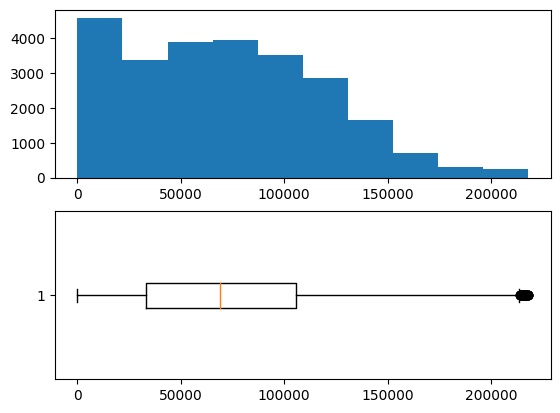

In [57]:
plt.subplot(2,1,1).hist(non_outlier_df['prevailing_wage'])
plt.subplot(2,1,2).boxplot(non_outlier_df['prevailing_wage'], vert = False)
plt.show()

### Outlier imputation

- Method1
    - less than outlier impute with lower bound
    - more than outlier imputer with upper bound

- Method2
    - replace outliers with the median

### # Method-1 cap: Winsorizantion

In [58]:
# Method-1 cap: Winsorizantion
Q1 = np.percentile(wage_data,25)
Q3 = np.percentile(wage_data,75)
IQR = Q3 - Q1
lb = Q1 - 1.5*IQR
ub = Q3 + 1.5*IQR

l = []
for i in wage_data:
    if i < lb:
        l.append(lb)
    elif i > ub:
        l.append(ub)
    else:
        l.append(i)
df['wage_data_new'] = l

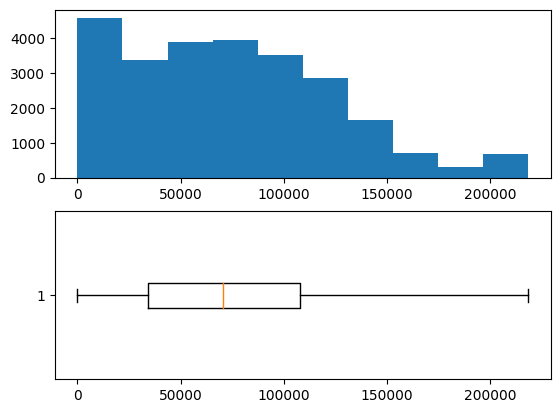

In [59]:
plt.subplot(2,1,1).hist(df['wage_data_new'])
plt.subplot(2,1,2).boxplot(df['wage_data_new'], vert = False)
plt.show()

In [60]:
# we can do the same with the "clip" method

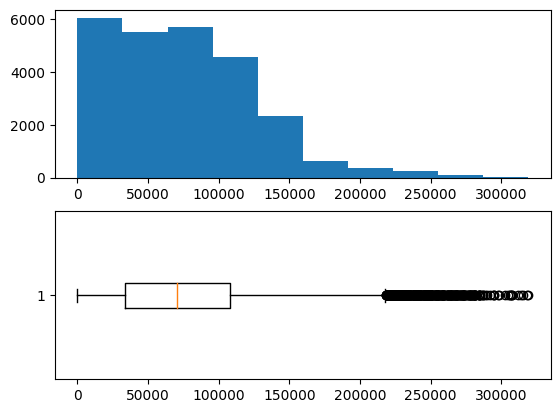

In [61]:
df['prevailing_wage_usingclip'] = df['prevailing_wage'].clip(lb,ub)
plt.subplot(2,1,1).hist(df['prevailing_wage'])
plt.subplot(2,1,2).boxplot(df['prevailing_wage'], vert = False)
plt.show()

In [62]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,wage_data_new,prevailing_wage_usingclip
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.20290,592.20290
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.65000,83425.65000
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.86000,122996.86000
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.03000,83434.03000
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.39000,149907.39000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.57000,77092.57000
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,218315.56125,218315.56125
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.85000,146298.85000
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.77000,86154.77000


In [63]:
# Method-2 Median
Q1 = np.percentile(wage_data,25)
Q3 = np.percentile(wage_data,75)
IQR = Q3 - Q1
lb = Q1 - 1.5*IQR
ub = Q3 + 1.5*IQR

l = []
for i in wage_data:
    if lb > i or i > ub:
        l.append(wage_data.median())
    else:
        l.append(i)
df['wage_data_new_median'] = l

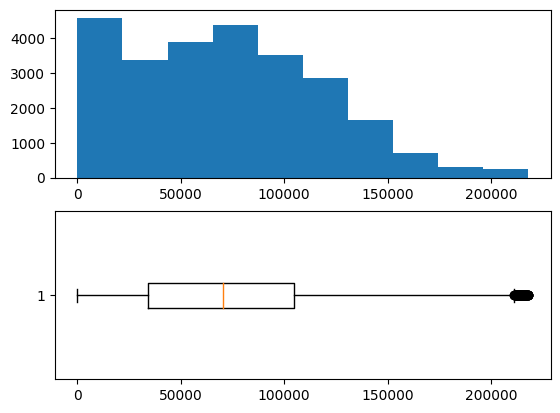

In [64]:
plt.subplot(2,1,1).hist(df['wage_data_new_median'])
plt.subplot(2,1,2).boxplot(df['wage_data_new_median'], vert = False)
plt.show()

In [65]:
df['wage_data_new_median'].value_counts()

wage_data_new_median
70308.21    427
6036.67       2
122.65        2
118.43        2
100.66        2
           ... 
48616.69      1
46471.14      1
45860.26      1
46989.57      1
70876.91      1
Name: count, Length: 25028, dtype: int64

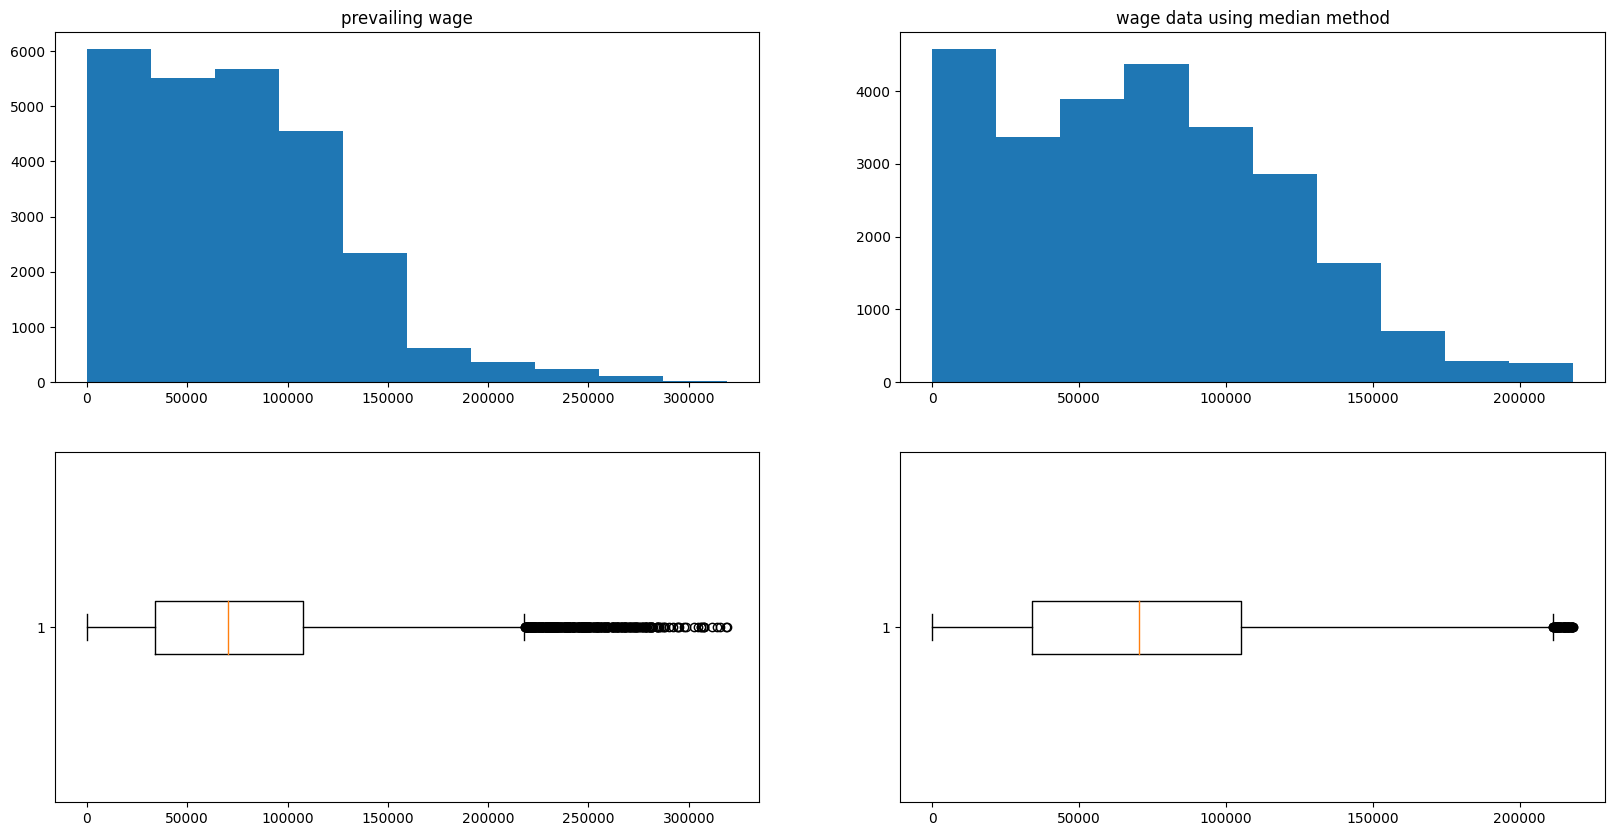

In [66]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1).hist(df['prevailing_wage'])
plt.title('prevailing wage')

plt.subplot(2,2,2).hist(df['wage_data_new_median'])
plt.title('wage data using median method')

plt.subplot(2,2,3).boxplot(df['prevailing_wage'], vert = False)
plt.subplot(2,2,4).boxplot(df['wage_data_new_median'], vert = False)
plt.show()